In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def u(x):
    return np.sin(np.pi*x)

def f(x):
    return -(np.pi**2)*np.sin(np.pi*x)

def f_xx(x):
    return (np.pi**4)*np.sin(np.pi*x)

In [3]:
def iter_solver(N,h,u_fd,x,max_iter,max_tol):

    norm_scaling = 1.0/N

    norm = 1e6
    previous_norm = 1e10
    relative_norm = 1.0

    iter = 0
    while relative_norm > max_tol and iter < max_iter:
        norm = 0.0
        for i in range(1, N-1):
            residual = (u_fd[i-1] - 2.0*u_fd[i] + u_fd[i+1]) / (h*h) - f(x[i]) - f_xx(x[i])*((h*h)/12.0)
            jacobian = -2.0/(h*h)

            u_new = u_fd[i] - residual/(jacobian+1e-6)

            norm += abs(residual)**2

            u_fd[i] = u_new
        # end for

        norm *= norm_scaling

        relative_norm = abs(norm - previous_norm)/(previous_norm + 1e-6)
        previous_norm = norm

        iter += 1
    # end while

    return [u_fd, norm,relative_norm, iter]


N:  128
h:  0.007874015748031496
Relative norm:  9.090013976237758e-16
Num_iterations:  43154
Max error: 9.6e-10


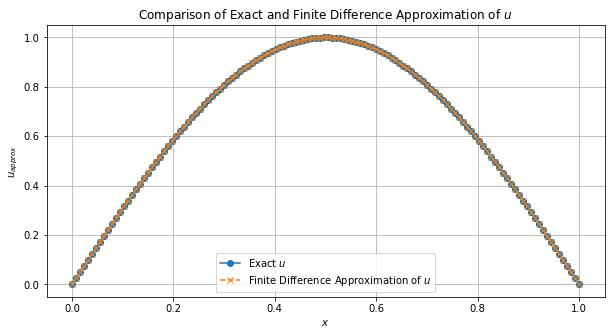

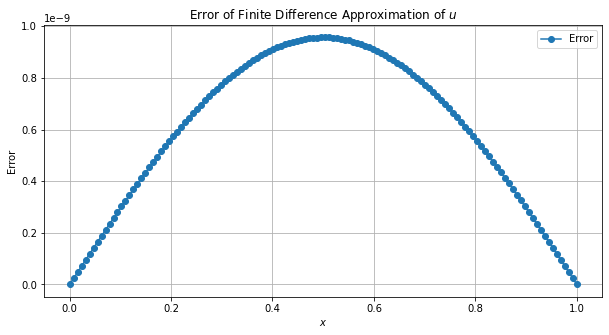

In [4]:
# Domain setup
Num_points = 128
x = np.linspace(0, 1, Num_points)
h = 1.0/(Num_points-1)

# Function values at grid points
u_true = u(x)

# Boundary conditions (Dirichlet)
u_fd = np.zeros_like(u_true)
u_fd[1:Num_points-1] = 20.0

max_iter = 100000
max_tol = 1e-15

# Solve
u_fd, norm, relative_norm, iter = iter_solver(Num_points,h,u_fd,x,max_iter,max_tol)

error = np.abs(u_true - u_fd)

print("N: ", Num_points)
print("h: ", h)
print("Relative norm: ", relative_norm)
print("Num_iterations: ", iter)
print(f"Max error: {np.max(error):.1e}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x, u_true, label='Exact $u$', linestyle='-', marker='o')
plt.plot(x, u_fd, label='Finite Difference Approximation of $u$', linestyle='--', marker='x')
plt.title('Comparison of Exact and Finite Difference Approximation of $u$')
plt.xlabel('$x$')
plt.ylabel('$u_{approx}$')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(x, error, label='Error', linestyle='-', marker='o')
plt.title('Error of Finite Difference Approximation of $u$')
plt.xlabel('$x$')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# Domain setup
N_values = [8, 16, 32, 64, 128]  # Different grid resolutions
errors = []

for Num_points in N_values:
    x = np.linspace(0, 1, Num_points)
    h = 1.0 / (Num_points - 1)

    # Function values at grid points
    u_true = u(x)

    # Boundary conditions (Dirichlet)
    u_fd = np.zeros_like(u_true)
    u_fd[1:Num_points - 1] = 20.0

    max_iter = 100000
    max_tol = 1e-15

    # Solve
    u_fd, norm, relative_norm, iter = iter_solver(Num_points, h, u_fd, x, max_iter, max_tol)

    error = np.abs(u_true - u_fd)
    errors.append(np.max(error))

# Compute the estimated convergence rate
convergence_rates = []
for i in range(len(errors) - 1):
    N1, N2 = N_values[i], N_values[i + 1]
    error1, error2 = errors[i], errors[i + 1]
    rate = np.log(error2 / error1) / np.log(N1 / N2)
    convergence_rates.append(rate)

print("Estimated convergence rates:")
for i, rate in enumerate(convergence_rates):
    print(f"N={N_values[i]} to N={N_values[i + 1]}: {rate:.2f}")

Estimated convergence rates:
N=8 to N=16: 4.38
N=16 to N=32: 4.19
N=32 to N=64: 4.09
N=64 to N=128: 4.16
